In [ ]:
# THOSE GET STUCK ON INSTALLING NUMPY ... might function, but hangs a lot on building a numpy whl ...
# !pip uninstall -y numpy
# !pip uninstall -y pandas
# !echo -e 'numpy --no-binary=numpy\npandas==2.2.2\ngensim' > requirements.txt && pip install -r requirements.txt

In [ ]:
# INSTALLED VERSION FROM A REPLY OF: https://stackoverflow.com/questions/79515458/gensim-on-google-colab-modulenotfounderror-no-module-named-numpy-strings
!pip3 install gensim==4.3
!pip3 install numpy==1.26
!pip3 install scipy==1.13.1
# AFTER THOSE INSTALL "Restart Session" on Colab, IGNORE the "errors" this cell might have (clear its output)
# After restarting the Colab session, just run next cell without this one ...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 42.7 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=b3ce63148a1fa1b69f02c037b4be4adc7fd2f64aba6d7fe66f3242e6107f7e90
  Stored in directory: /root/.cache/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3506 sha256=1a2982dd29e543faa7d00cf34e4bd0f4df9de7b105f43b42949af7b2b23b7181
  Stored in directory: /root/.cache

^C
^C


In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-300")  # download the model and return as object ready for use

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
emb_df = pd.DataFrame([], columns=[])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv("/content/drive/MyDrive/checkpoint_12_df.csv")
df = df.astype(str)

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

In [ ]:
def get_column_embeddings(row):
  global model
  global column
  tokens = word_tokenize(row[column].lower())
  for token in tokens:
      if token in stopwords:
          tokens.remove(token)
  embeddings = [model[token] for token in tokens if token in model]
  if embeddings:
      return sum(embeddings) / len(embeddings)
  else:
      return [0] * model.vector_size

def get_title_abstract_embeddings(row):
  global model
  global column
  tokens = word_tokenize(row["title"].lower())
  tokens.extend( word_tokenize(row["abstract"].lower()) )
  for token in tokens:
      if token in stopwords:
          tokens.remove(token)
  embeddings = [model[token] for token in tokens if token in model]
  if embeddings:
      return sum(embeddings) / len(embeddings)
  else:
      return [0] * model.vector_size

column = "title"
emb_df["title_embeddings"] = df.apply( get_column_embeddings, axis=1 )
column = "abstract"
emb_df["abstract_embeddings"] = df.apply( get_column_embeddings, axis=1 )
emb_df["title_abstract_embeddings"] = df.apply( get_title_abstract_embeddings, axis=1 )
column = "keywords"
emb_df["keywords_embeddings"] = df.apply( get_column_embeddings, axis=1 )
column = "mesh"
emb_df["mesh_embeddings"] = df.apply( get_column_embeddings, axis=1 )
emb_df["year"] = df["year"]
emb_df["pmid"] = df["pmid"]
emb_df.to_csv("/content/drive/MyDrive/emb_df.csv", index=False)

In [ ]:
# Disconnect and Delete Runtime, then re-read this to refresh all the libraries and so on to the default versios ...

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import re
!pip install demjson3
from demjson3 import decode
import matplotlib.pyplot as plt
import seaborn as sns

import json
!pip install autoviz
from ast import literal_eval
import numpy as np

from pathlib import Path
import os
import glob

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75281 sha256=4e0d6938d7d08d84d9b23535f5e11359b96b6497622bbf77c13a15b7ce7c0214
  Stored in directory: /root/.cache/pip/wheels/3b/9d/d5/e8cbb4d529989f6d3f347fe914559ea4f66715bf299763af1c
Successfully built demjson3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.6 MB/s eta 0:00:00
   ━

In [ ]:
csv_df = pd.DataFrame(columns=[])
# for file in glob.glob("/content/drive/MyDrive/changed_CD012768*.csv"): # tested the whole thing only on "changed_CD012768.csv" and "changed_CD012768 (copy).csv" ...
for file in glob.glob("/content/drive/MyDrive/Feature_extraction_results/*.csv"):
  filename = os.path.basename(file)
  temp_df = pd.read_csv(file)
  temp_df[ "Filename" ]=filename
  if ( "'int'" in str(type(csv_df)) ):
    csv_df = temp_df.copy()
  else:
    csv_df = pd.concat([csv_df, temp_df], axis=0, ignore_index=True)
  print( "All " + str(temp_df.shape[0]) + " rows of \"" + file + "\" were added to \"csv_df\" .. " )
  # print( "\"csv_df\" has " + str(csv_df.shape[0]) + " rows ..." )
  # csv_df = csv_df.drop_duplicates()
  print( "\"csv_df\" has " + str(csv_df.shape[0]) + " rows after duplicate removal ..." )
  print( "===========" )

emb_df = pd.read_csv("/content/drive/MyDrive/emb_df.csv")

In [ ]:
def convert_to_list(row):
  # print(row)
  # print(type(row))
  k = re.sub('[\s]', ',', row.replace("\n", "") )
  while ",," in k:
      k = k.replace(",,", ",")
  k = k.replace("[,", "[")
  k = k.replace(",]", "]")
  # print(k)
  return json.loads(k)

emb_df["title_embeddings"] = emb_df["title_embeddings"].apply(convert_to_list)
emb_df["abstract_embeddings"] = emb_df["abstract_embeddings"].apply(convert_to_list)
emb_df["title_abstract_embeddings"] = emb_df["title_abstract_embeddings"].apply(convert_to_list)
emb_df["keywords_embeddings"] = emb_df["keywords_embeddings"].apply(convert_to_list)
emb_df["mesh_embeddings"] = emb_df["mesh_embeddings"].apply(convert_to_list)

In [ ]:
%%capture
def get_avg_status(row): # averages the acceptance of an article thoughout all the available literature review
  statuses = csv_df[csv_df["PMID"] == np.int64(row)]["Status"].tolist()
  print(statuses)
  count_pos = 0
  count_neg = 0
  for status in statuses:
    if status == 1:
      count_pos = count_pos + 1
    else:
      count_neg = count_neg + 1
  if count_pos > count_neg:
    return '1'
  else:
    return '0'

emb_df["status"] = emb_df["pmid"].apply(get_avg_status)
emb_df = emb_df.astype(str)

In [ ]:
emb_df.to_csv("/content/drive/MyDrive/emb_df_annotated.csv", index=False)

In [ ]:
emb_df_annotated = pd.read_csv("/content/drive/MyDrive/emb_df_annotated.csv")
emb_df_annotated = emb_df_annotated.astype(str)

# covnerting strings to lists - necessary, or it reads embeddings as Series
emb_df_annotated["title_embeddings"] = emb_df_annotated["title_embeddings"].apply(literal_eval)
emb_df_annotated["abstract_embeddings"] = emb_df_annotated["abstract_embeddings"].apply(literal_eval)
emb_df_annotated["title_abstract_embeddings"] = emb_df_annotated["title_abstract_embeddings"].apply(literal_eval)
emb_df_annotated["keywords_embeddings"] = emb_df_annotated["keywords_embeddings"].apply(literal_eval)
emb_df_annotated["mesh_embeddings"] = emb_df_annotated["mesh_embeddings"].apply(literal_eval)
emb_df_annotated["year"] = emb_df_annotated["year"].apply(literal_eval)
emb_df_annotated["status"] = emb_df_annotated["status"].apply(literal_eval)

In [ ]:
min_year = min(emb_df_annotated["year"])
max_year = max(emb_df_annotated["year"])
embedding_size = len(emb_df_annotated["title_embeddings"].iloc[0])
import random
def reshape_feature(row):
  global min_year
  global max_year
  global embedding_size
  res = []

  # the following conditions only function for the given columns: year and status
  if ( row < 0 or row > 1 ): # for year
    row = ( row - min_year ) / (max_year - min_year)
  # else: # for status
  #   if row == 1:
  #     row = float(random.uniform(1.8, 2))
  #   else:
  #     row = float(random.uniform(-2, -1.8))

  for i in range(0, embedding_size):
    res.append(row)
  return res

emb_df_annotated["year"] = emb_df_annotated["year"].apply(reshape_feature)
# emb_df_annotated["status"] = emb_df_annotated["status"].apply(reshape_feature)
# emb_df_annotated[["year", "status"]]

def get_corr_matrix(row): # calculating correlation coefficients for each row
  return np.corrcoef(row.tolist())

corr_matrices = emb_df_annotated[['title_embeddings', 'abstract_embeddings', 'title_abstract_embeddings',
       'keywords_embeddings', 'mesh_embeddings', 'year']].apply(get_corr_matrix, axis=1)

for i in range(0, len(corr_matrices)): # changing "nan" with 0.0
  corr_matrices[i][np.isnan(corr_matrices[i])] = 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


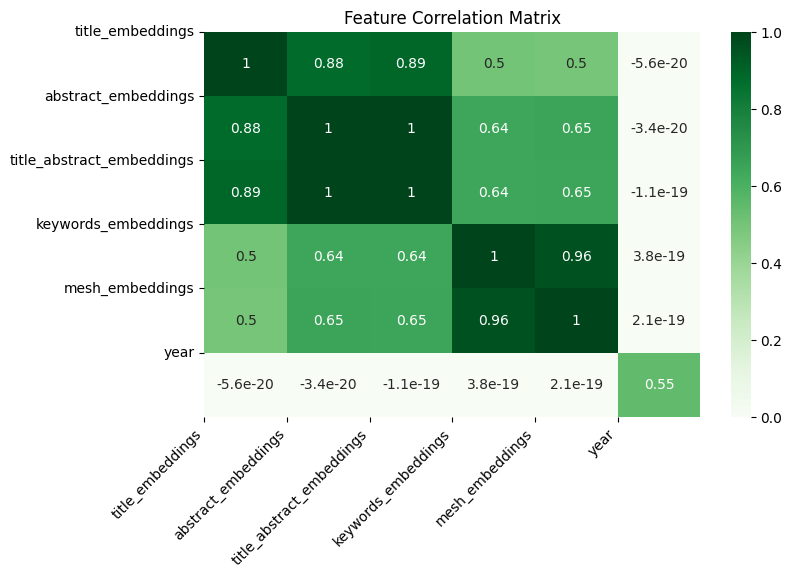

In [ ]:
# getting correlation data
correlation_matrix = np.average(corr_matrices).tolist()
variables = emb_df_annotated.columns.drop("pmid").drop("status").tolist()

# generating the correlation matrix
plt.subplots(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap="Greens", annot=True )
plt.xticks(range(len(correlation_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), variables, rotation=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# emb_df_annotated = pd.read_csv("/content/drive/MyDrive/emb_df_annotated.csv")
# emb_df_annotated = emb_df_annotated.astype(str)
# !python -m textblob.download_corpora # to fix AutoViz plot generation issues ...
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
dft = AV.AutoViz(filename="", depVar='status', dfte=emb_df_annotated);

Shape of your Data Set loaded: (119, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


TypeError: unhashable type: 'list'

In [ ]:
emb_df_annotated.columns

Index(['title_embeddings', 'abstract_embeddings', 'title_abstract_embeddings',
       'keywords_embeddings', 'mesh_embeddings', 'year', 'pmid', 'status'],
      dtype='object')

In [ ]:
emb_df_annotated.columns

Index(['title_embeddings', 'abstract_embeddings', 'title_abstract_embeddings',
       'keywords_embeddings', 'mesh_embeddings', 'year', 'pmid', 'status'],
      dtype='object')

In [ ]:
emb_df_annotated = pd.read_csv("/content/drive/MyDrive/emb_df_annotated.csv")

from ast import literal_eval
emb_df_annotated['title_embeddings'] = emb_df_annotated['title_embeddings'].apply(literal_eval)
emb_df_annotated['abstract_embeddings'] = emb_df_annotated['abstract_embeddings'].apply(literal_eval)
emb_df_annotated['title_abstract_embeddings'] = emb_df_annotated['title_abstract_embeddings'].apply(literal_eval)
emb_df_annotated['keywords_embeddings'] = emb_df_annotated['keywords_embeddings'].apply(literal_eval)
emb_df_annotated['mesh_embeddings'] = emb_df_annotated['mesh_embeddings'].apply(literal_eval)

# def avg_col(row):
#   row = json.loads(row)
#   return np.average(row)

# emb_df_annotated["title_embeddings"] = emb_df_annotated["title_embeddings"].apply(avg_col)
# emb_df_annotated["abstract_embeddings"] = emb_df_annotated["abstract_embeddings"].apply(avg_col)
# emb_df_annotated["title_abstract_embeddings"] = emb_df_annotated["title_abstract_embeddings"].apply(avg_col)
# emb_df_annotated["keywords_embeddings"] = emb_df_annotated["keywords_embeddings"].apply(avg_col)
# emb_df_annotated["mesh_embeddings"] = emb_df_annotated["mesh_embeddings"].apply(avg_col)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X = emb_df_annotated.drop("status", axis=1).drop("pmid", axis=1).drop("year", axis=1).values
y = emb_df_annotated["status"].values

In [ ]:
# UNCOMMENT THIS TO TRAIN MODELS ON A LITERATURE REVIEW CSV INSTEAD ON ALL THE ARTICLES .. .
lit_rev_0 = pd.read_csv("/content/drive/MyDrive/DTA/CD012768/finished_new_prompt_CD012768.csv")

lit_rev_0 = lit_rev_0.rename(columns={"PMID": "pmid"})
lit_rev_0 = lit_rev_0.rename(columns={"Status": "status"})
lit_rev_0 = lit_rev_0[["pmid", "status"]]

emb_df_annotated = pd.merge(emb_df_annotated, lit_rev_0, on="pmid", how="inner")
emb_df_annotated = emb_df_annotated.rename(columns={"status_y": "status"}).drop( "status_x", axis=1 )

X = emb_df_annotated.drop("status", axis=1).drop("pmid", axis=1).drop("year", axis=1).values
y = emb_df_annotated["status"].values
X = X.tolist()
y = y.tolist()
X = np.array(X)
y = np.array(y)
X = X.reshape(119, -1)

In [ ]:
# for i in range(0, len(X)):
#   for j in range(0, len(X[i]) ):
#     X[i][j] = decode(X[i][j])
# for i in range(0, len(y)):
#   for j in range(0, len(y[i]) ):
#     y[i][j] = decode(y[i][j])

In [ ]:
print( np.array(X).shape ) # REDUCE DIMENSION TO 2 SHOULD FUNTION
# https://stackoverflow.com/questions/32838802/numpy-with-python-convert-3d-array-to-2d
X = np.array(X)
y = np.array(y)


X = X.tolist()
y = y.tolist()
X = np.array(X)
y = np.array(y)

X = X.reshape(26806, -1)

print(X.shape)
print(y.shape)

(26806, 5)
(26806, 125)
(26806,)


In [ ]:
def calculate_mda(y_test, y_predict): # Mean Directional Accuracy (MDA)
    import tensorflow as tf
    y_test = np.array(y_test).astype('int32')
    y = tf.constant(y_test)
    y_predict = y_predict.astype('int32')
    y_hat = tf.constant(y_predict)
    return np.array(tf.reduce_mean(tf.cast(tf.equal(tf.sign(y[1:] - y[:-1]), tf.sign(y_hat[1:] - y_hat[:-1])), tf.float32))).item(0)

import os
directory="/content/drive/MyDrive/Embedded_Feature_Plots_3/"
if not os.path.exists(directory):
    os.makedirs(directory)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, root_mean_squared_log_error, root_mean_squared_error, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, classification_report, confusion_matrix

results = []
def compute_model( model ): # function used to train/evaluate each of the used models, besides the final NN one
  global X, y
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
  model.fit(X_train, y_train)
  acc_train = model.score(X_train, y_train);
  acc_test = model.score(X_test, y_test)
  print(f"{type(model).__name__} Accuracy (test set): ", acc_test) # evaluating accuracy on the testing dataset
  y_predict = model.predict(X_test) # predicting values on the testing dataset

  precision = precision_score(y_test, y_predict, average="weighted")
  recall = recall_score(y_test, y_predict, average="weighted")
  f1 = f1_score(y_test, y_predict, average="weighted")
  f2 = fbeta_score(y_test, y_predict, beta=2, average="weighted")

  f = open(f'/content/drive/MyDrive/Embedded_Feature_Plots_3/{type(model).__name__}_classification_report.txt','w')
  print(classification_report(y_test, y_predict), file=f) # using predicted values to generate a classification report (to see multiple evaluation metrics for each class)

  plt.figure(figsize = (5,3))
  sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, cmap=sns.color_palette("Greens"), fmt='g' ) # confusion matrix
  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('Ground Truth', fontsize=10);
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/Embedded_Feature_Plots_3/{type(model).__name__}_confusion_matrix.png')

  score = model.score(X_test, y_test);
  cv_scores = cross_val_score(model, X_test, y_test, cv=5)
  cv_mean = sum(cv_scores) / len(cv_scores);
  r_squared = r2_score(y_test, y_predict)
  r_squared_adjusted = 1 - (1-r2_score(y_test, y_predict)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  evs = explained_variance_score(y_test, y_predict)
  mbe = np.mean(np.array(y_predict) - np.array(y_test))
  mse = mean_squared_error(y_test, y_predict)
  mse = mse * mse;
  rmse = mean_squared_error(y_test, y_predict)
  mae = mean_absolute_error(y_test, y_predict)
  rmae = root_mean_squared_error(y_test, y_predict)
  msle = mean_squared_log_error(y_test, y_predict)
  rmsle = root_mean_squared_log_error(y_test, y_predict)
  mape = mean_absolute_percentage_error(y_test, y_predict)
  # wmape = weighted_mape(np.array(y_test), np.array(y_predict))
  # smape = calculate_smape(np.array(y_test), np.array(y_predict))
  mda = calculate_mda( y_test, y_predict )
  medae = median_absolute_error(y_test, y_predict)

  results.append( [ type(model).__name__, y_train.shape[0], y_test.shape[0], acc_train, acc_test, score, precision, recall, f1, f1, cv_mean, r_squared, r_squared_adjusted, evs, mbe, mse, rmse, mae, rmae, msle, rmsle, mape, mda, medae ] )
  model_results = pd.DataFrame(results)
  model_results.columns = ['Model', "Training Size", "Testing Size", 'acc_train', 'acc_test', 'score', 'precision', 'recall', 'f1_score', 'f2_score', 'cv_mean', 'r_squared', 'r_squared_adjusted', 'evs', 'mbe', 'mse', 'rmse', 'mae', 'rmae', 'msle', 'rmsle', 'mape', 'mda', 'medae' ]
  model_results = model_results.sort_values(by=['acc_test'], ascending=False) # then sort it by the most important metric so you know which model is the best
  model_results.to_csv("drive/MyDrive/Literature_Review_Models_3.csv", index=False) # saving the preprocessed dataset to a file


FixedThresholdClassifier Accuracy (test set):  0.5
TunedThresholdClassifierCV Accuracy (test set):  0.7083333333333334
KNeighborsClassifier Accuracy (test set):  0.5
NearestCentroid Accuracy (test set):  0.5416666666666666
SGDClassifier Accuracy (test set):  0.75
RidgeClassifierCV Accuracy (test set):  0.5
RidgeClassifier Accuracy (test set):  0.6666666666666666
Perceptron Accuracy (test set):  0.3333333333333333
PassiveAggressiveClassifier Accuracy (test set):  0.625
SVC Accuracy (test set):  0.7083333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

LinearSVC Accuracy (test set):  0.4166666666666667
RandomForestClassifier Accuracy (test set):  0.6666666666666666
AdaBoostClassifier Accuracy (test set):  0.5416666666666666
BaggingClassifier Accuracy (test set):  0.5833333333333334
ExtraTreesClassifier Accuracy (test set):  0.5416666666666666
GradientBoostingClassifier Accuracy (test set):  0.75
HistGradientBoostingClassifier Accuracy (test set):  0.7916666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy (test set):  0.5833333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

DecisionTreeClassifier Accuracy (test set):  0.4583333333333333
ExtraTreeClassifier Accuracy (test set):  0.75
RadiusNeighborsClassifier Accuracy (test set):  0.625


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

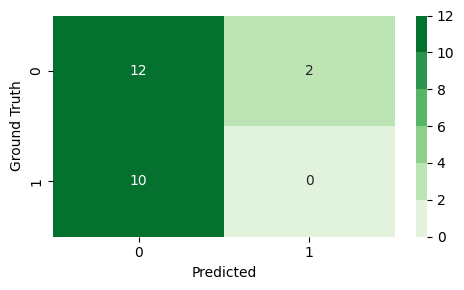

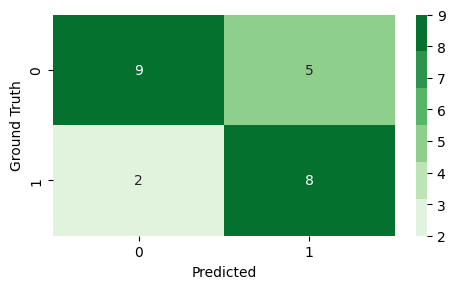

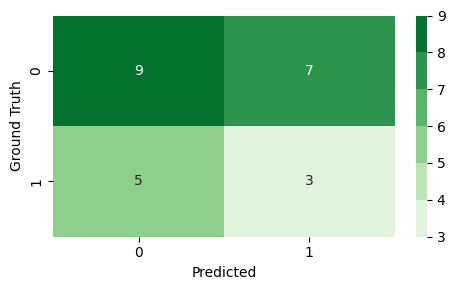

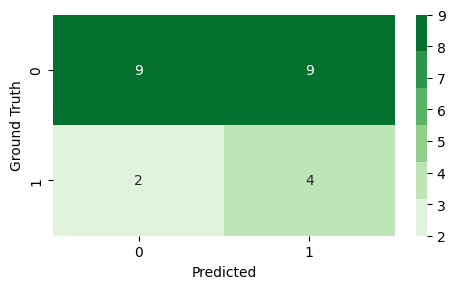

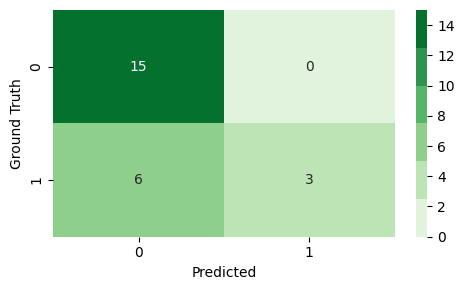

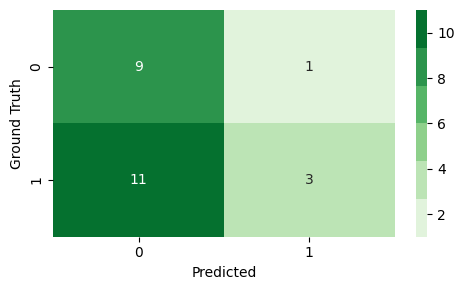

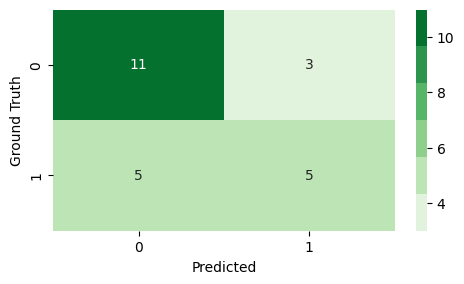

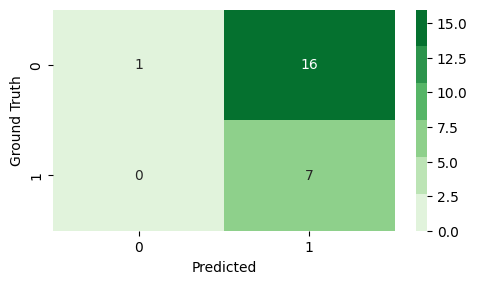

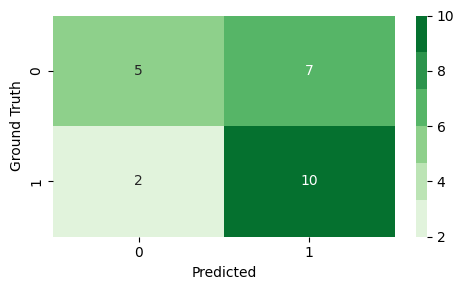

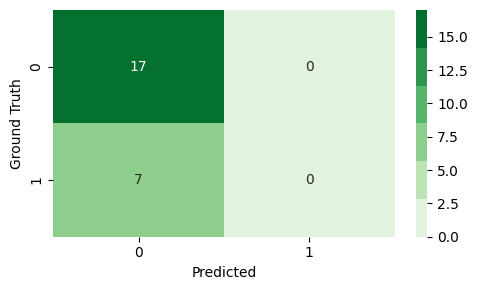

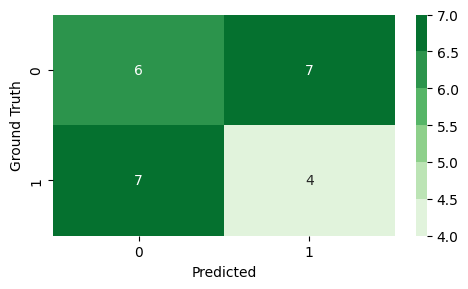

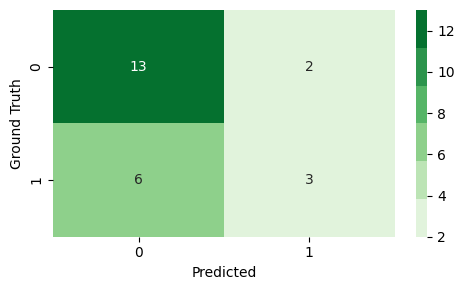

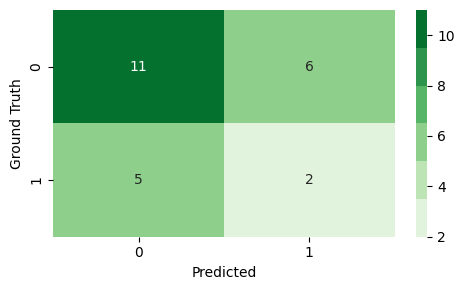

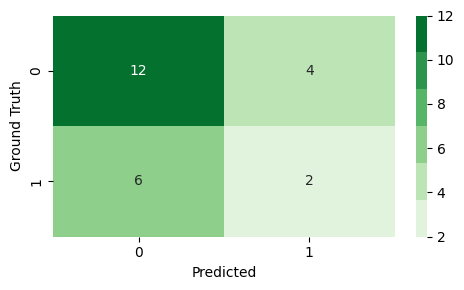

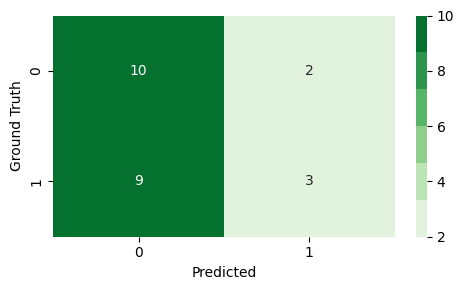

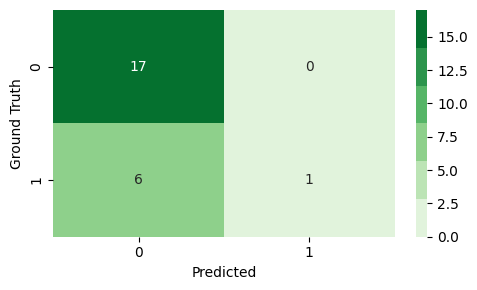

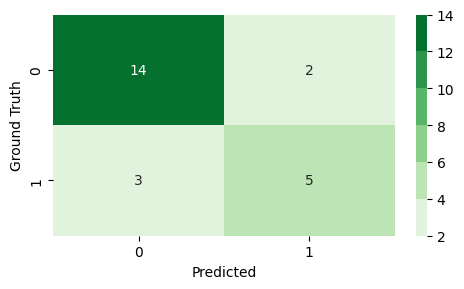

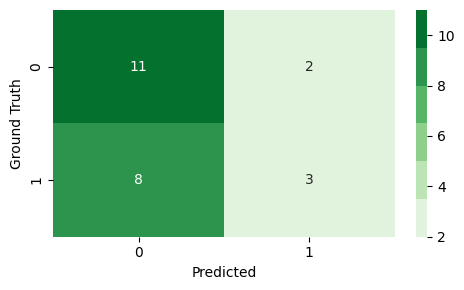

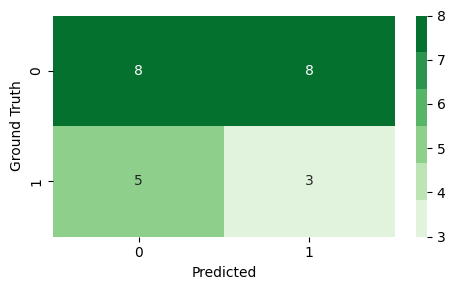

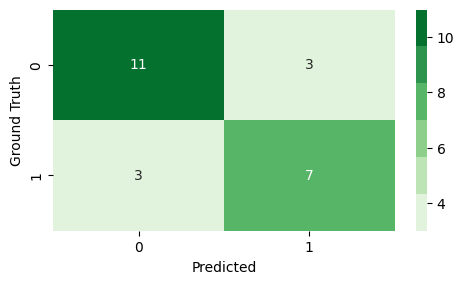

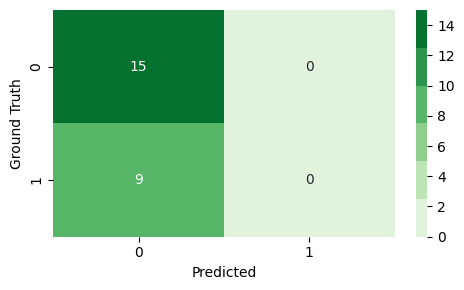

In [ ]:
from sklearn.model_selection import train_test_split, FixedThresholdClassifier, TunedThresholdClassifierCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

compute_model( FixedThresholdClassifier(ExtraTreesClassifier()) )
compute_model( TunedThresholdClassifierCV(ExtraTreesClassifier()) )
compute_model( KNeighborsClassifier() )
compute_model( NearestCentroid() )
compute_model( SGDClassifier() )
compute_model( RidgeClassifierCV() )
compute_model( RidgeClassifier() )
compute_model( Perceptron() )
compute_model( PassiveAggressiveClassifier() )
compute_model( SVC() )
compute_model( LinearSVC() )
compute_model( RandomForestClassifier() )
compute_model( AdaBoostClassifier() )
compute_model( BaggingClassifier() )
compute_model( ExtraTreesClassifier() )
compute_model( GradientBoostingClassifier() )
compute_model( HistGradientBoostingClassifier() )
compute_model( MLPClassifier() )
compute_model( DecisionTreeClassifier() )
compute_model( ExtraTreeClassifier() )
compute_model( RadiusNeighborsClassifier(radius=3.4) ) # runs out of available RAM on colab

In [ ]:
%%capture
results = pd.read_csv("drive/MyDrive/Literature_Review_Models_3.csv")

import os
directory="/content/drive/MyDrive/Embedded_Feature_Plots_3/"
if not os.path.exists(directory):
    os.makedirs(directory)

import os
directory="/content/drive/MyDrive/Embedded_Feature_Plots_3/Evaluation/"
if not os.path.exists(directory):
    os.makedirs(directory)


def generate_figures(column):
  plt.figure(figsize=(10, 5))
  global results
  results_sorted = results.sort_values(column)
  for_plotting = pd.Series(results_sorted[ column ].tolist(), results_sorted[ "Model" ].tolist())
  for_plotting.plot(kind='barh', color='green')
  plt.title(f'Plot of ordered "{column}" values for all models')
  plt.tight_layout()
  plt.savefig(f'/content/drive/MyDrive/Embedded_Feature_Plots_3/Evaluation/{column}.png')

for column in results.columns.tolist():
  if column not in [ "Model", "Training Size", "Testing Size"]:
    generate_figures(column)

In [ ]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, y)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)
lasso1_coef = lasso1_coef.reshape(5, -1).mean(axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+01, tolerance: 4.163e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso1_coef.shape

(5,)

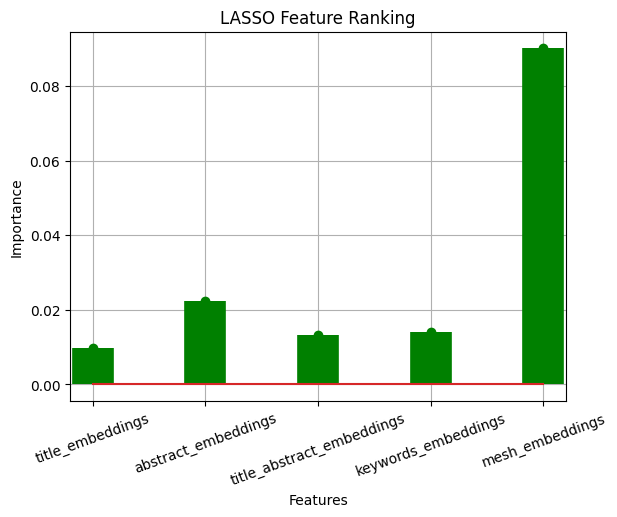

In [ ]:
%matplotlib inline
variables = emb_df_annotated.columns.drop("pmid").drop("status").drop("year").tolist()
markerline, stemlines, baseline = plt.stem(variables, lasso1_coef, 'g')
plt.setp(stemlines, 'linewidth', 30)
plt.xticks(rotation=20)
plt.grid()
plt.title("LASSO Feature Ranking")
plt.xlabel("Features")
plt.ylabel("Importance")
# plt.ylim(0, 0.15)
plt.show()

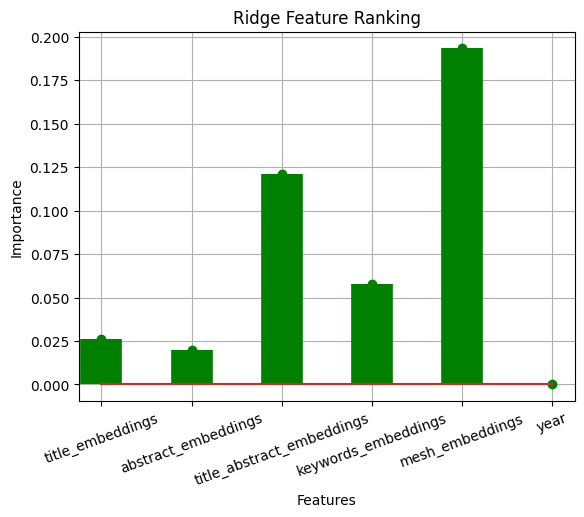

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X, y)

# Using np.abs() to make coefficients positive.
ridge_coef = np.abs(ridge.coef_)

%matplotlib inline
variables = emb_df_annotated.columns.drop("pmid").drop("status").tolist()
markerline, stemlines, baseline = plt.stem(variables, ridge_coef, 'g')
plt.setp(stemlines, 'linewidth', 30)
plt.xticks(rotation=20)
plt.grid()
plt.title("Ridge Feature Ranking")
plt.xlabel("Features")
plt.ylabel("Importance")
# plt.ylim(0, 0.15)
plt.show()

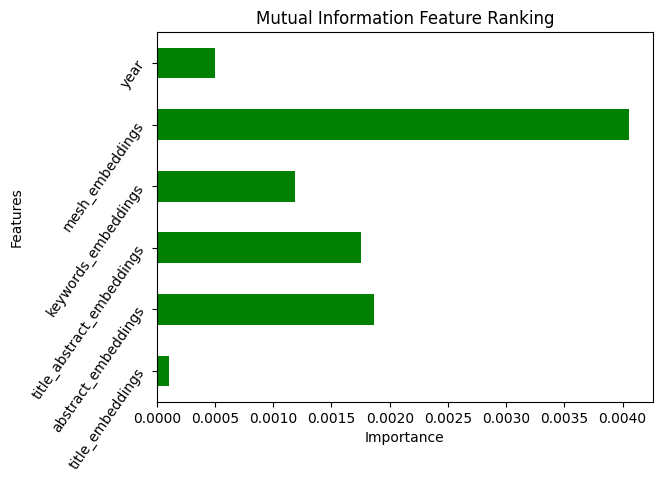

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, variables)
feat_importances.plot(kind='barh', color = 'green')

plt.yticks(rotation=55)

plt.title("Mutual Information Feature Ranking")
plt.ylabel("Features")
plt.xlabel("Importance")

plt.show()

In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

In [ ]:
len(X)

26806

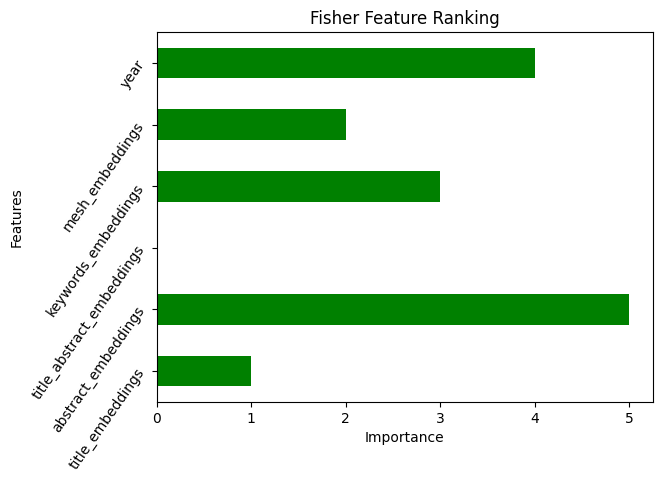

In [ ]:
X_fisher = X[:10000] # if there's many more, it runs out of RAM on Colab ... with 26806 it crashes for sure ...
y_fisher = y[:10000]

%matplotlib inline

# Calculating scores
ranks = fisher_score.fisher_score(X_fisher, y_fisher)

# Plotting the ranks
feat_importances = pd.Series(ranks, variables)
feat_importances.plot(kind='barh', color = 'green')

plt.yticks(rotation=55)

plt.title("Fisher Feature Ranking")
plt.ylabel("Features")
plt.xlabel("Importance")

plt.show()

In [ ]:
emb_df_annotated["title_embeddings"].iloc[0]

np.float64(-0.10155954479999998)

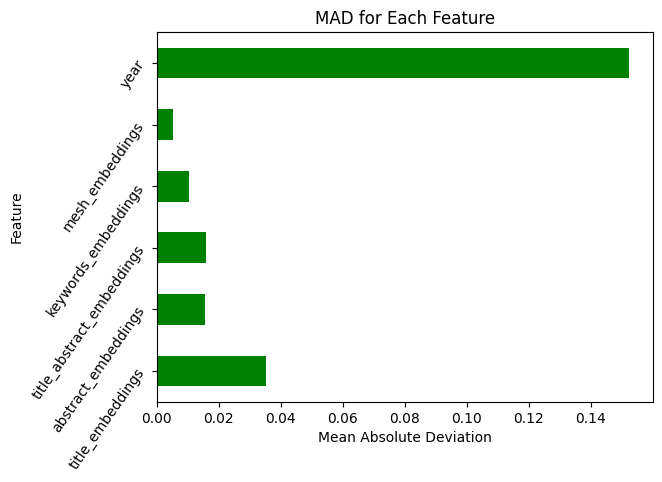

In [ ]:
emb_df_annotated = pd.read_csv("/content/drive/MyDrive/emb_df_annotated.csv")

min_year = min(emb_df_annotated["year"])
max_year = max(emb_df_annotated["year"])
embedding_size = len(emb_df_annotated["title_embeddings"].iloc[0])
import random
def reshape_feature(row):
  global min_year
  global max_year
  global embedding_size
  res = []

  if ( row < 0 or row > 1 ): # for year
    row = ( row - min_year ) / (max_year - min_year)

  for i in range(0, embedding_size):
    res.append(row)
  return res

emb_df_annotated["year"] = emb_df_annotated["year"].apply(reshape_feature)
emb_df_annotated = emb_df_annotated.astype(str)

def avg_col(row):
  # print(type(row))
  # print(row)
  row = json.loads(row)
  return np.average(row)

emb_df_annotated["title_embeddings"] = emb_df_annotated["title_embeddings"].apply(avg_col)
emb_df_annotated["abstract_embeddings"] = emb_df_annotated["abstract_embeddings"].apply(avg_col)
emb_df_annotated["title_abstract_embeddings"] = emb_df_annotated["title_abstract_embeddings"].apply(avg_col)
emb_df_annotated["keywords_embeddings"] = emb_df_annotated["keywords_embeddings"].apply(avg_col)
emb_df_annotated["mesh_embeddings"] = emb_df_annotated["mesh_embeddings"].apply(avg_col)
emb_df_annotated["year"] = emb_df_annotated["year"].apply(avg_col)

X = emb_df_annotated.drop("status", axis=1).drop("pmid", axis=1).values
y = emb_df_annotated["status"].values

mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis=0)), axis=0) / X.shape[0]

variables = emb_df_annotated.columns.drop("pmid").drop("status").tolist()
feat_importances = pd.Series(mean_abs_diff, variables)
feat_importances.plot(kind='barh', color = 'green')
plt.ylabel("Feature")

plt.yticks(rotation=55)

plt.xlabel("Mean Absolute Deviation")
plt.title("MAD for Each Feature")
plt.show()

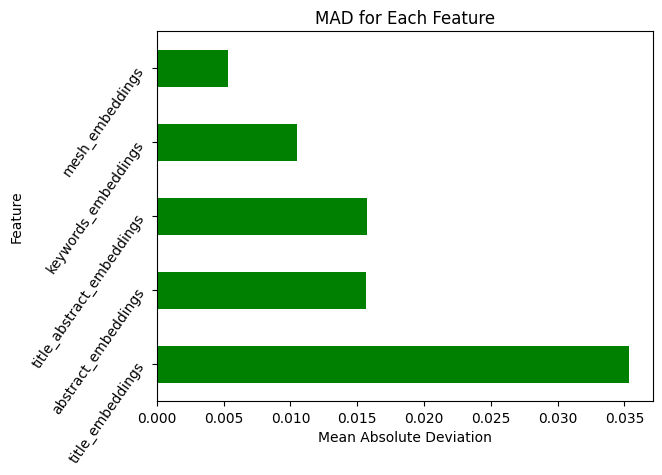

In [ ]:
mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis=0)), axis=0) / X.shape[0]
mean_abs_diff = mean_abs_diff[:-1] # remove year

# Plot the bar chart
variables = emb_df_annotated.columns.drop("pmid").drop("year").drop("status").tolist()
feat_importances = pd.Series(mean_abs_diff, variables)
feat_importances.plot(kind='barh', color = 'green')
plt.ylabel("Feature")
plt.xlabel("Mean Absolute Deviation")
plt.title("MAD for Each Feature")
plt.yticks(rotation=55)

plt.show()

In [ ]:
# FORWARD feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# knn = KNeighborsClassifier(n_neighbors=2)
rf = RandomForestClassifier(n_estimators=10)
ffs = SequentialFeatureSelector(rf, k_features=6, forward=True, cv=4)
ffs.fit(X, y)
pd.DataFrame.from_dict(ffs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.9841838257236646, 0.9841838257236646, 0.984...",0.98422,"(5,)",0.000079,0.000064,0.000037
2,"(3, 5)","[0.9814980602805132, 0.9826917338108028, 0.980...",0.980862,"(3, 5)",0.001947,0.001582,0.000913
3,"(2, 3, 5)","[0.9838854073410922, 0.9834377797672337, 0.983...",0.983548,"(2, 3, 5)",0.000353,0.000287,0.000166
4,"(1, 2, 3, 5)","[0.9840346165323784, 0.9841838257236646, 0.984...",0.984145,"(1, 2, 3, 5)",0.000079,0.000064,0.000037
5,"(1, 2, 3, 4, 5)","[0.9837361981498061, 0.9841838257236646, 0.984...",0.984145,"(1, 2, 3, 4, 5)",0.0003,0.000244,0.000141
6,"(0, 1, 2, 3, 4, 5)","[0.9835869889585198, 0.9841838257236646, 0.984...",0.983996,"(0, 1, 2, 3, 4, 5)",0.0003,0.000244,0.000141


In [ ]:
# BACKWARD feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# knn = KNeighborsClassifier(n_neighbors=2)
rf = RandomForestClassifier(n_estimators=10)
bfs = SequentialFeatureSelector(rf, k_features=1, forward=False, cv=4)
bfs.fit(X, y)
pd.DataFrame.from_dict(bfs.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 2, 3, 4, 5)","[0.9840346165323784, 0.9841838257236646, 0.984...",0.984145,"(0, 1, 2, 3, 4, 5)",0.000152,0.000123,0.000071
5,"(0, 1, 3, 4, 5)","[0.9841838257236646, 0.9840346165323784, 0.984...",0.984183,"(0, 1, 3, 4, 5)",0.000129,0.000105,0.00006
4,"(0, 1, 3, 4)","[0.9840346165323784, 0.9841838257236646, 0.984...",0.984183,"(0, 1, 3, 4)",0.000129,0.000105,0.00006
3,"(0, 1, 3)","[0.9840346165323784, 0.9841838257236646, 0.984...",0.984071,"(0, 1, 3)",0.00008,0.000065,0.000038
2,"(0, 1)","[0.9840346165323784, 0.9835869889585198, 0.983...",0.983847,"(0, 1)",0.000238,0.000194,0.000112
1,"(1,)","[0.969859743360191, 0.9746344374813488, 0.9749...",0.973327,"(1,)",0.002508,0.002038,0.001176


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(X, y)

importances = model.feature_importances_

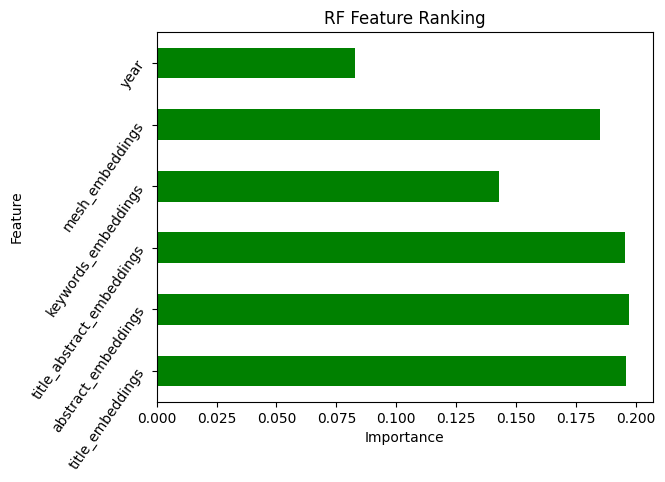

In [ ]:
variables = emb_df_annotated.columns.drop("pmid").drop("status").tolist()
feat_importances = pd.Series(importances, variables)
feat_importances.plot(kind='barh', color = 'green')
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title("RF Feature Ranking")
plt.yticks(rotation=55)

plt.show()

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_estimators=10), min_features=4, max_features=6, scoring='roc_auc', cv=2)
efs.fit(X, y)

In [ ]:
efs.best_idx_

(1, 3, 4, 5)

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestClassifier(n_estimators=10), n_features_to_select=4)
rfe.fit(X, y)
rfe.ranking_ # this means that features at indices [0, 1, 2, 4] are ranked as first choices

array([1, 1, 1, 2, 1, 3])

In [ ]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold = 0.10)
variance_threshold.fit(X)
variance_threshold.get_support()

array([False, False, False, False, False,  True])

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
k_best_selector = SelectKBest(k=4)
X_selected = k_best_selector.fit_transform(X, y)
selected_features = np.argsort(k_best_selector.scores_)[::-1][:4]
selected_features

array([4, 5, 2, 1])

In [ ]:
# Most of the feature ranking code is heavily inspired by:
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

In [ ]:
# ALL PRETRAINED GENSIM MODELS:

  # fasttext-wiki-news-subwords-300
# conceptnet-numberbatch-17-06-300
# word2vec-ruscorpora-300
# word2vec-google-news-300
  # glove-wiki-gigaword-50
  # glove-wiki-gigaword-100
  # glove-wiki-gigaword-200
  # glove-wiki-gigaword-300
# glove-twitter-25
# glove-twitter-50
# glove-twitter-100
# glove-twitter-200
# __testing_word2vec-matrix-synopsis

In [ ]:
import random
import numpy as np

# topics are from: https://cks.nice.org.uk/topics/
topics = [ "Abdominal aortic aneurysm screening", "Abortion", "Achilles tendinopathy", "Acne vulgaris", "Acute childhood limp", "Acute kidney injury", "Addison's disease", "Adult malnutrition", "Age-related macular degeneration", "AIDS and HIV infection", "Allergic rhinitis", "Alopecia areata", "Amenorrhoea", "Anaemia - B12 and folate deficiency", "Anaemia - iron deficiency", "Anal fissure", "Analgesia - mild-to-moderate pain", "Angina", "Angio-oedema and anaphylaxis", "Animal and human bites", "Antenatal and postnatal depression", "Antenatal care - uncomplicated pregnancy", "Anticoagulation - oral", "Antiplatelet treatment", "Aphthous ulcer", "Appendicitis", "Asthma", "Atrial fibrillation", "Attention deficit hyperactivity disorder", "Autism in adults", "Autism in children", "Axial spondyloarthritis (including ankylosing spondylitis)", "B12 and folate deficiency anaemia", "Back pain - low (without radiculopathy)", "Bacterial meningitis and meningococcal disease", "Bacterial vaginosis", "Baker's cyst", "Balanitis", "Bedwetting (enuresis)", "Bell's palsy", "Benign paroxysmal positional vertigo", "Bipolar disorder", "Bites - human and animal", "Bites and stings - insect", "Blackouts and syncope", "Blepharitis", "Boils, carbuncles, and staphylococcal carriage", "Bone and soft tissue sarcoma - recognition and referral", "Bowel screening", "Brain and central nervous system cancers - recognition and referral", "Breast abscess and mastitis", "Breast cancer - managing FH", "Breast cancer - recognition and referral", "Breast pain - cyclical", "Breast screening", "Breastfeeding problems", "Breathlessness", "Bronchiectasis", "Bruising", "Bunions", "Burns and scalds", "Bursitis - pre-patellar", "Candida - female genital", "Candida - oral", "Candida - skin", "Carbon monoxide poisoning", "Carbuncles, boils and staphylococcal carriage", "Cardiac arrest - out of hospital care", "Carpal tunnel syndrome", "Cataracts", "Cellulitis - acute", "Central nervous system and brain cancers - recognition and referral", "Cerebral palsy", "Cervical cancer and HPV", "Cervical radiculopathy - neck pain", "Cervical screening", "Chalazion (meibomian cyst)", "Chest infections - adult", "Chest pain", "Chickenpox", "Chilblains", "Child maltreatment - recognition and management", "Childhood cancers - recognition and referral", "Childhood limp - acute", "Chlamydia - uncomplicated genital", "Cholecystitis - acute", "Cholesteatoma", "Chronic kidney disease", "Chronic obstructive pulmonary disease", "Chronic pain", "Cirrhosis", "Coeliac disease", "Colic - infantile", "Colic - renal or ureteric (acute)", "Common cold", "Common musculoskeletal presentations in children", "Compression stockings", "Conduct disorders in children and young people", "Conjunctivitis - allergic", "Conjunctivitis - infective", "Constipation", "Constipation in children", "Contraception - assessment", "Contraception - barrier methods and spermicides", "Contraception - combined hormonal methods", "Contraception - emergency", "Contraception - IUC", "Contraception - natural family planning", "Contraception - progestogen-only methods", "Contraception - sterilization", "Corneal superficial injury", "Coronavirus - COVID-19", "Corticosteroids - inhaled", "Corticosteroids - oral", "Corticosteroids - topical (skin), nose, and eyes", "Cough", "Cough - acute with chest signs in children", "Cow's milk allergy in children", "Crohn's disease", "Croup", "Cushing's syndrome", "CVD prevention - lipid modification", "CVD risk assessment and management", "Deep vein thrombosis", "Delirium", "Dementia", "Dental abscess", "Depression", "Depression - antenatal and postnatal", "Depression in children", "Dermatitis - contact", "Diabetes - type 1", "Diabetes - type 2", "Diabetes type 1 - insulin therapy", "Diabetes type 2 - insulin therapy", "Diarrhoea - adult's assessment", "Diarrhoea - antibiotic associated", "Diarrhoea - prevention and advice for travellers", "Diverticular disease", "DMARDs", "Domestic abuse", "Dry eye disease", "Dupuytren's disease", "DVT prevention for travellers", "Dysmenorrhoea", "Dyspepsia - pregnancy-associated", "Dyspepsia - proven functional", "Dyspepsia - proven GORD", "Dyspepsia - proven peptic ulcer", "Dyspepsia - unidentified cause", "Earwax", "Eating disorders", "Ectopic pregnancy", "Eczema - atopic", "End of life care in children", "Endometriosis", "Enuresis - bedwetting", "Epilepsy", "Epistaxis (nosebleeds)", "Erectile dysfunction", "Erythrocytosis/polycythaemia", "Faecal incontinence in adults", "Falls - risk assessment", "Faltering growth", "Febrile seizure", "Female pattern hair loss (female androgenetic alopecia)", "Feverish children - management", "Feverish children - risk assessment and management", "Fibroids", "Folate and B12 deficiency anaemia", "Food allergy", "Functional neurological disorder", "Fungal nail infection", "Fungal skin infection - body and groin", "Fungal skin infection - foot", "Fungal skin infection - scalp", "Gallstones", "Gastroenteritis", "Gastrointestinal tract (lower) cancers - recognition and referral", "Gastrointestinal tract (upper) cancers - recognition and referral", "Generalized anxiety disorder", "Giant cell arteritis", "Gilbert's syndrome", "Gingivitis and periodontitis", "Glaucoma", "Gonorrhoea", "GORD in children", "Gout", "Greater trochanteric pain syndrome", "Gynaecological cancers - recognition and referral", "Haematological cancers - recognition and referral", "Haematospermia", "Haemorrhoids", "Halitosis", "Hand, foot, and mouth disease", "Head and neck cancers - recognition and referral", "Head injury", "Head lice", "Headache - assessment", "Headache - cluster", "Headache - medication overuse", "Headache - tension-type", "Healthcare-associated infections", "Hearing loss in adults", "Heart failure - chronic", "Hepatitis A", "Hepatitis B", "Hepatitis C", "Herpes simplex - genital", "Herpes simplex - ocular", "Herpes simplex - oral", "Herpetic whitlow - and staphylococcal", "Hiccups", "Hirsutism", "HIV infection and AIDS", "Hordeola (styes)", "HPV and cervical cancer", "Human and animal bites", "Hypercalcaemia", "Hypercholesterolaemia - familial", "Hyperhidrosis", "Hypertension", "Hypertension in pregnancy", "Hyperthyroidism", "Hypokalaemia", "Hyponatraemia", "Hypothyroidism", "Immunizations - childhood", "Immunizations - pneumococcal", "Immunizations - seasonal influenza", "Immunizations - travel", "Impetigo", "Incontinence - urinary, in women", "Infectious mononucleosis - Glandular fever", "Infectious mononucleosis (glandular fever)", "Infertility", "Influenza - seasonal", "Influenza (seasonal) - immunizations", "Insect bites and stings", "Insomnia", "Insulin therapy in type 1 diabetes", "Insulin therapy in type 2 diabetes", "Integrated health and social care for people experiencing homelessness", "Iron deficiency anaemia", "Irritable bowel syndrome", "Itch - widespread", "Itch in pregnancy", "Jaundice in adults", "Jaundice in the newborn", "Kidney disease - chronic", "Kidney injury - acute", "Knee pain - assessment", "Lacerations", "Learning disabilities", "Leg cramps", "Leg ulcer - venous", "Limp (childhood) - acute", "Lipid modification - CVD prevention", "Lipodermatosclerosis and venous eczema", "Long-term effects of coronavirus (long COVID)", "Low back pain (without radiculopathy)", "Lung and pleural cancers - recognition and referral", "LUTS in men", "Lyme disease", "Macular degeneration - age-related", "Malaria", "Malaria prophylaxis", "Male pattern hair loss (male androgenetic alopecia)", "Mastitis and breast abscess", "Measles", "Meibomian cyst (chalazion)", "Melanoma", "Ménière's disease", "Meningitis - bacterial meningitis and meningococcal disease", "Menopause", "Menorrhagia (heavy menstrual bleeding)", "Mental health in students", "MI - secondary prevention", "Migraine", "Miscarriage", "Molluscum contagiosum", "Morton's neuroma", "MRSA in primary care", "Multimorbidity", "Multiple myeloma", "Multiple sclerosis", "Mumps", "Nappy rash", "Nausea/vomiting in pregnancy", "Neck lump", "Neck pain - acute torticollis", "Neck pain - cervical radiculopathy", "Neck pain - non-specific", "Neck pain - whiplash injury", "Neuralgia - post-herpetic", "Neutropenic sepsis", "Nocturnal enuresis - bedwetting", "Nosebleeds (epistaxis)", "NSAIDs - prescribing issues", "Obesity", "Obsessive-compulsive disorder", "Obstructive sleep apnoea syndrome", "Olecranon bursitis", "Opioid dependence", "Osgood-Schlatter disease", "Osteoarthritis", "Osteoporosis - prevention of fragility fractures", "Otitis externa", "Otitis media - acute", "Otitis media - chronic suppurative", "Otitis media with effusion", "Ovarian cancer", "Palliative cancer care - pain", "Palliative care - constipation", "Palliative care - cough", "Palliative care - dyspnoea", "Palliative care - general issues", "Palliative care - malignant skin ulcer", "Palliative care - nausea and vomiting", "Palliative care - oral", "Palliative care - secretions", "Palpitations", "Pancreatitis - acute", "Pancreatitis - chronic", "Parkinson's disease", "Paronychia - acute", "Parvovirus B19 infection", "Pelvic inflammatory disease", "Periodontitis and gingivitis", "Peripheral arterial disease", "Pigmented lesions and melanoma", "Pilonidal sinus disease", "Pityriasis rosea", "Pityriasis versicolor", "Plantar fasciitis", "Platelets - abnormal counts and cancer", "Pneumococcal immunizations", "Poisoning or overdose", "Polycystic ovary syndrome", "Polycythaemia/erythrocytosis", "Polymyalgia rheumatica", "Post-herpetic neuralgia", "Post-traumatic stress disorder", "Postnatal and antenatal depression", "Postnatal care", "Pre-conception - advice and management", "Pre-patellar bursitis", "Pregnancy (uncomplicated) - antenatal care", "Premenstrual syndrome", "Pressure ulcers", "Prostate cancer", "Prostatitis - acute", "Prostatitis - chronic", "Pruritus ani", "Pruritus vulvae", "Psoriasis", "Psychosis and schizophrenia", "Pubic lice", "Pulmonary embolism", "Pyelonephritis - acute", "Radiculopathy (cervical) - neck pain", "Radiculopathy (lumbar) - sciatica", "Raynaud's phenomenon", "Red eye", "Rehabilitation after traumatic injury", "Renal or ureteric colic - acute", "Restless legs syndrome", "Retinal detachment", "Rheumatoid arthritis", "Rosacea", "Roundworm", "Rubella", "Safeguarding adults in care homes", "Sarcoidosis", "Sarcoma (bone and soft tissue) - recognition and referral", "Scabies", "Scalds and burns", "Scarlet fever", "Schizophrenia and psychosis", "Sciatica (lumbar radiculopathy)", "Scrotal pain and swelling", "Seborrhoeic dermatitis", "Self-harm", "Sepsis", "Shingles", "Shoulder pain", "Sickle cell disease", "Sinusitis", "Skin cancers - recognition and referral", "Sleep disorders - shift work and jet lag", "Sore throat - acute", "Spondyloarthritis and psoriatic arthropathy", "Sprains and strains", "Squint in children", "Staphylococcal carriage, boils and carbuncles", "Staphylococcal whitlow - and herpetic", "Stroke and TIA", "Styes (hordeola)", "Superficial vein thrombosis (superficial thrombophlebitis)", "Support for adult carers", "Syphilis", "Tamoxifen - managing adverse effects", "Teething", "Temporomandibular disorders (TMDs)", "Tennis elbow", "Threadworm", "Tinnitus", "Tiredness/fatigue in adults", "Torticollis (acute) - neck pain", "Travel immunizations", "Trichomoniasis", "Trigeminal neuralgia", "Tuberculosis", "Type 1 diabetes", "Type 1 diabetes - insulin therapy", "Type 2 diabetes", "Type 2 diabetes - insulin therapy", "Ulcerative colitis", "Ulcers - aphthous", "Undescended testes", "Urethritis - male", "Urinary incontinence in women", "Urinary tract infection - children", "Urinary tract infection (lower) - men", "Urinary tract infection (lower) - women", "Urological cancers - recognition and referral", "Urticaria", "Uveitis", "Vaginal discharge", "Varicocele", "Varicose veins", "Venous eczema and lipodermatosclerosis", "Vertigo", "Vertigo - benign paroxysmal positional", "Veruccae and warts", "Vestibular neuronitis", "Vitamin D deficiency in adults", "Vitamin D deficiency in children", "Vitiligo", "Warts - anogenital", "Warts and verrucae", "Whiplash injury - neck pain", "Whitlow (staphylococcal and herpetic)", "Whooping cough" ]

all_criteria = ["experimental, observational or both" "be published in the last 5 years", "english", "adult participants only", "subjects past the age of 40 only", "at least 20 participants", "peer reviewed", "mentions results", "the experimental setting is mentioned", "cohort study", "case-control", "diagnosed with the topic condition for at least 1 year", "Adult participants", "Healthy subjects", "Patients with chronic diseases", "Participants with specific comorbidities", "Pregnant women", "Older adults", "Children aged 6-12", "Adolescents aged 13-18", "Participants with specific genetic conditions", "Individuals with mental health disorders", "Subjects from diverse ethnic backgrounds", "Participants with low socioeconomic status", "Patients seeking non-invasive treatments", "Volunteers from community health centers", "Participants with a history of hypertension", "Patients with diabetes mellitus", "Individuals with autoimmune diseases", "Participants undergoing rehabilitation", "Subjects with cardiovascular conditions", "Patients with respiratory diseases", "Individuals with musculoskeletal disorders", "Subjects with cancer", "Participants with obesity", "Individuals with sleep disorders", "Patients with neurological conditions", "Subjects with gastrointestinal disorders", "Participants with endocrine disorders", "Patients with skin conditions", "Individuals with chronic pain", "Subjects with infectious diseases", "Participants from underserved populations", "Female participants", "Male participants", "Participants with a family history of disease", "Individuals with disability", "Healthcare workers as study subjects", "Participants in specific geographic locations", "Individuals who consent to participate", "Patients enrolled in clinical trials", "Subjects from specific age groups", "Participants with stage I cancer", "Individuals receiving preventive care", "Participants with stable disease", "Patients free from acute illness", "Subjects with a diagnosis confirmed by a healthcare provider", "Participants who speak the local language", "Subjects with adherence to treatment protocol", "Individuals willing to complete follow-up assessments", "Patients who have received standard care", "Subjects with a documented health history", "Participants with manageable side effects", "Individuals without contraindications for specific treatments", "Participants who are not pregnant", "Subjects with regular follow-up appointments", "Patients having no recent surgery", "Individuals with no history of substance abuse", "Participants with a stable living environment", "Individuals with access to healthcare services", "Subjects with specific lab results within normal ranges", "Patients not taking disallowed medications", "Participants from specific educational backgrounds", "Subjects with previous participation in health programs", "Participants who exercise regularly", "Subjects adhering to dietary guidelines", "Individuals active in community engagement", "Patients with established social support systems", "Participants proficient in study-related tasks", "Subjects with stable mental health", "Individuals who understand study protocols", "Patients willing to provide medical history", "Participants engaged in therapeutic interventions", "Individuals with no significant cognitive impairment", "Subjects without recent hospitalization", "Participants in long-term care settings", "Patients involved in lifestyle modification programs", "Individuals who have not traveled recently", "Participants enrolled in academic institutions", "Subjects using specific health monitoring tools", "Patients with positive response to previous treatment", "Individuals participating in health education workshops", "Participants with availability for study duration", "Subjects reporting accurate health information", "Patients with current insurance coverage", "Individuals engaged in self-management practices", "Participants who can provide informed consent", "Subjects with structured daily routines", "Patients who do not live in institutional settings", "Individuals with access to nutritious food", "Participants involved in peer support groups", "Subjects without untreated medical conditions", "Patients receiving coordinated care", "Individuals with no history of allergies", "Participants with reliable transportation access", "Subjects willing to adhere to dietary restrictions", "Patients able to maintain contact with researchers", "Individuals able to comprehend consent forms", "Participants demonstrating interest in study aims", "Subjects with mental acuity for assessments", "Patients with a stable family environment", "Individuals with effective communication skills", "Participants with prior knowledge of study topic", "Subjects actively participating in therapy", "Patients who are motivated for treatment", "Individuals comfortable with technology use", "Participants living independently", "Subjects who do not smoke", "Patients without significant recent life changes", "Individuals with a demonstrated commitment to health", "Participants involved in volunteer work", "Subjects practicing mindfulness or relaxation techniques", "Patients with known treatment responsiveness", "Individuals willing to engage in follow-up interviews", "Participants willing to track personal health data", "Subjects maintaining regular health check-ups", "Patients reporting daily activity levels", "Individuals participating in fitness programs", "Participants who can attend scheduled appointments", "Subjects able to understand eligibility criteria", "Patients with controlled symptoms", "Individuals willing to comply with intervention protocols", "Participants with minimal language barriers", "Subjects displaying a positive attitude toward health", "Patients engaged in collaborative care models", "Individuals demonstrating cultural competency", "Participants with access to educational materials", "Subjects proficient with study instruments", "Patients committed to improving health literacy", "Individuals not on restrictive diets", "Participants with family support", "Subjects maintaining regular work schedules", "Patients who manage stress effectively", "Individuals adhering to regular medication regimens", "Participants involved in exercise groups", "Subjects practicing good hygiene", "Patients willing to report health status changes", "Individuals able to follow written instructions", "Participants who demonstrate resilience", "Subjects without concurrent major treatment", "Patients who can document health progress", "Individuals showing interest in study findings", "Participants with a strong support network", "Subjects willing to share experiences", "Patients without prior adverse reactions", "Individuals who agree to randomization procedures", "Participants able to follow up via phone or email", "Subjects without significant financial distress", "Patients who do not have caregiving responsibilities", "Individuals with previous successful health outcomes", "Participants open to behavioral interventions", "Subjects without health-related barriers", "Patients capable of self-reporting", "Individuals engaged in fitness education", "Participants attending wellness seminars", "Subjects living in stable communities", "Patients with a documented treatment plan", "Individuals able to follow a physical activity regimen", "Participants demonstrating goal-oriented behavior", "Subjects who can maintain health diaries", "Patients with positive feedback from healthcare providers", "Individuals aligned with health promotion initiatives", "Participants not currently participating in other trials", "Subjects without major psychiatric disorders", "Patients engaged in regular health assessments", "Individuals who attend support groups proactively", "Participants demonstrating improvement over time", "Subjects familiar with collaborative decision-making", "Patients displaying personal investment in health", "Individuals willing to engage in group discussions", "Participants with experience in health research", "Subjects experiencing chronic symptoms managed effectively", "Patients with an understanding of health risks", "Individuals providing accurate demographic data", "Participants committed to attending all sessions", "Subjects who have demonstrated improvements in lifestyle", "Patients who agree to dietary modifications", "Individuals free from significant financial obligations", "Participants driven by personal health goals", "Subjects demonstrating openness to recommendations", "Patients able to recognize symptom changes", "Individuals capable of articulating health needs", "Participants who practice self-monitoring", "Subjects remaining active in community health initiatives", "Patients who communicate openly about health concerns", "Individuals willing to explore new treatment modalities", "Participants comfortable sharing medical history", "Subjects with effective coping strategies", "Patients committed to frequent check-ins", "Individuals motivated by peer influence", "Participants who understand study objectives", "Subjects adhering to research guidelines", "Patients willing to review health literature", "Individuals able to maintain an optimistic outlook", "Participants involved in community fitness events", "Subjects who demonstrate accountability for health", "Patients with a positive relationship with caregivers", "Individuals with ongoing medical supervision", "Participants willing to engage in health advocacy", "Subjects committed to lifelong learning about health", "Patients maintaining a balanced lifestyle", "Individuals able to complete study questionnaires"]

def format_criteria(criteria_subset):
    formatted_criteria = ""
    for criterion in criteria_subset:
        formatted_criteria = formatted_criteria + "\n- " + criterion
    return formatted_criteria

inclusion_criteria_subset = []
exclusion_criteria_subset = []
topic = ""
selected_topics = []
def get_prompt( num = 0 ):
  global selected_topics
  global inclusion_criteria_subset
  global exclusion_criteria_subset
  global topic
  topic = random.choice(topics)
  while topic in selected_topics:
    topic = random.choice(topics)
  selected_topics.append(topic)
  inclusion_criteria_subset = np.random.choice(all_criteria, size=random.randint(4, 6))
  all_criteria_besides_inclusion = [x for x in all_criteria if x not in inclusion_criteria_subset]
  exclusion_criteria_subset = np.random.choice(all_criteria_besides_inclusion, size=random.randint(4, 6))

  if ( num < 0 ):
    return "Negative number of articles not allowed"

  upper_limit = -1
  lower_limit = -1
  if ( num == 0 ):
      upper_limit = 1
      lower_limit = 1
  else:
      upper_limit = num + int( num/2 )
      lower_limit = num - int( num/2 )

  prompt = f"""Role: You are a researcher writing titles, abstracts, full texts (~2000 words), keywords and MeSH terms for a scientific paper on the topic of \"{topic}\".

Task: Formulate title, abstract, full texts (~2000 words), keywords and MeSH terms that would not follow any of the following article selection criteria: {format_criteria(inclusion_criteria_subset)}

The generated data should follow all of the following criteria: {format_criteria(exclusion_criteria_subset)}

Provide your output in the following JSON format: {{ \"title\": \"\", \"abstract\": \"\", \"full_text\": \"\", \"keywords\": \"\", \"MeSH\": \"\" }}.
Include no \" or : characters besides the ones needed for the aforementioned JSON format.
Generate {random.randint(lower_limit, upper_limit)} JSONs within an array.
Keywords and MeSH terms should be lowercase and within arrays.
"""

  return prompt

def verify_llm_output():
  global inclusion_criteria_subset
  global exclusion_criteria_subset
  global topic
  prompt = f"""Role: You are a researcher screening titles, abstracts, full texts (~2000 words), keywords and MeSH provided in a {{ \"title\": \"\", \"abstract\": \"\", \"full_text\": \"\", \"keywords\": \"\", \"MeSH\": \"\" }} JSON format.

Task: Verify if all the provided inclusion and exclusion criteria as well as the topic of \"{topic}\" are found within the given JSON.

Inclusion criteria: {format_criteria(inclusion_criteria_subset)}

Exclusion criteria: {format_criteria(exclusion_criteria_subset)}

Provide your output in a JSON format that looks like this: {{ \"inclusion_criteria_found\": [\"criterion 1\", \"criterion 2\"], \"exclusion_criteria_found\": [\"criterion 1\", \"criterion 2\"], \"topic_found\": true/false }}

Include no \" or : characters besides the ones needed for the aforementioned JSON format.
"""
  return prompt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
base_directory="/content/drive/MyDrive/LLM-Generated Negative Articles/"
if not os.path.exists(base_directory):
    os.makedirs(base_directory)

for i in range(1, 101):
  directory = base_directory + "/Literature Review " + str(i) + "/"
  if not os.path.exists(directory):
      os.makedirs(directory)
  with open(directory + "prompt.txt", "w") as text_file:
      text_file.write(get_prompt(20))
  with open(directory + "check.txt", "w") as text_file:
      text_file.write(verify_llm_output())

Mounted at /content/drive
